Transforming over 1000 vertices to C_CONTIGUOUS.
Transforming over 1000 elements to C_CONTIGUOUS.


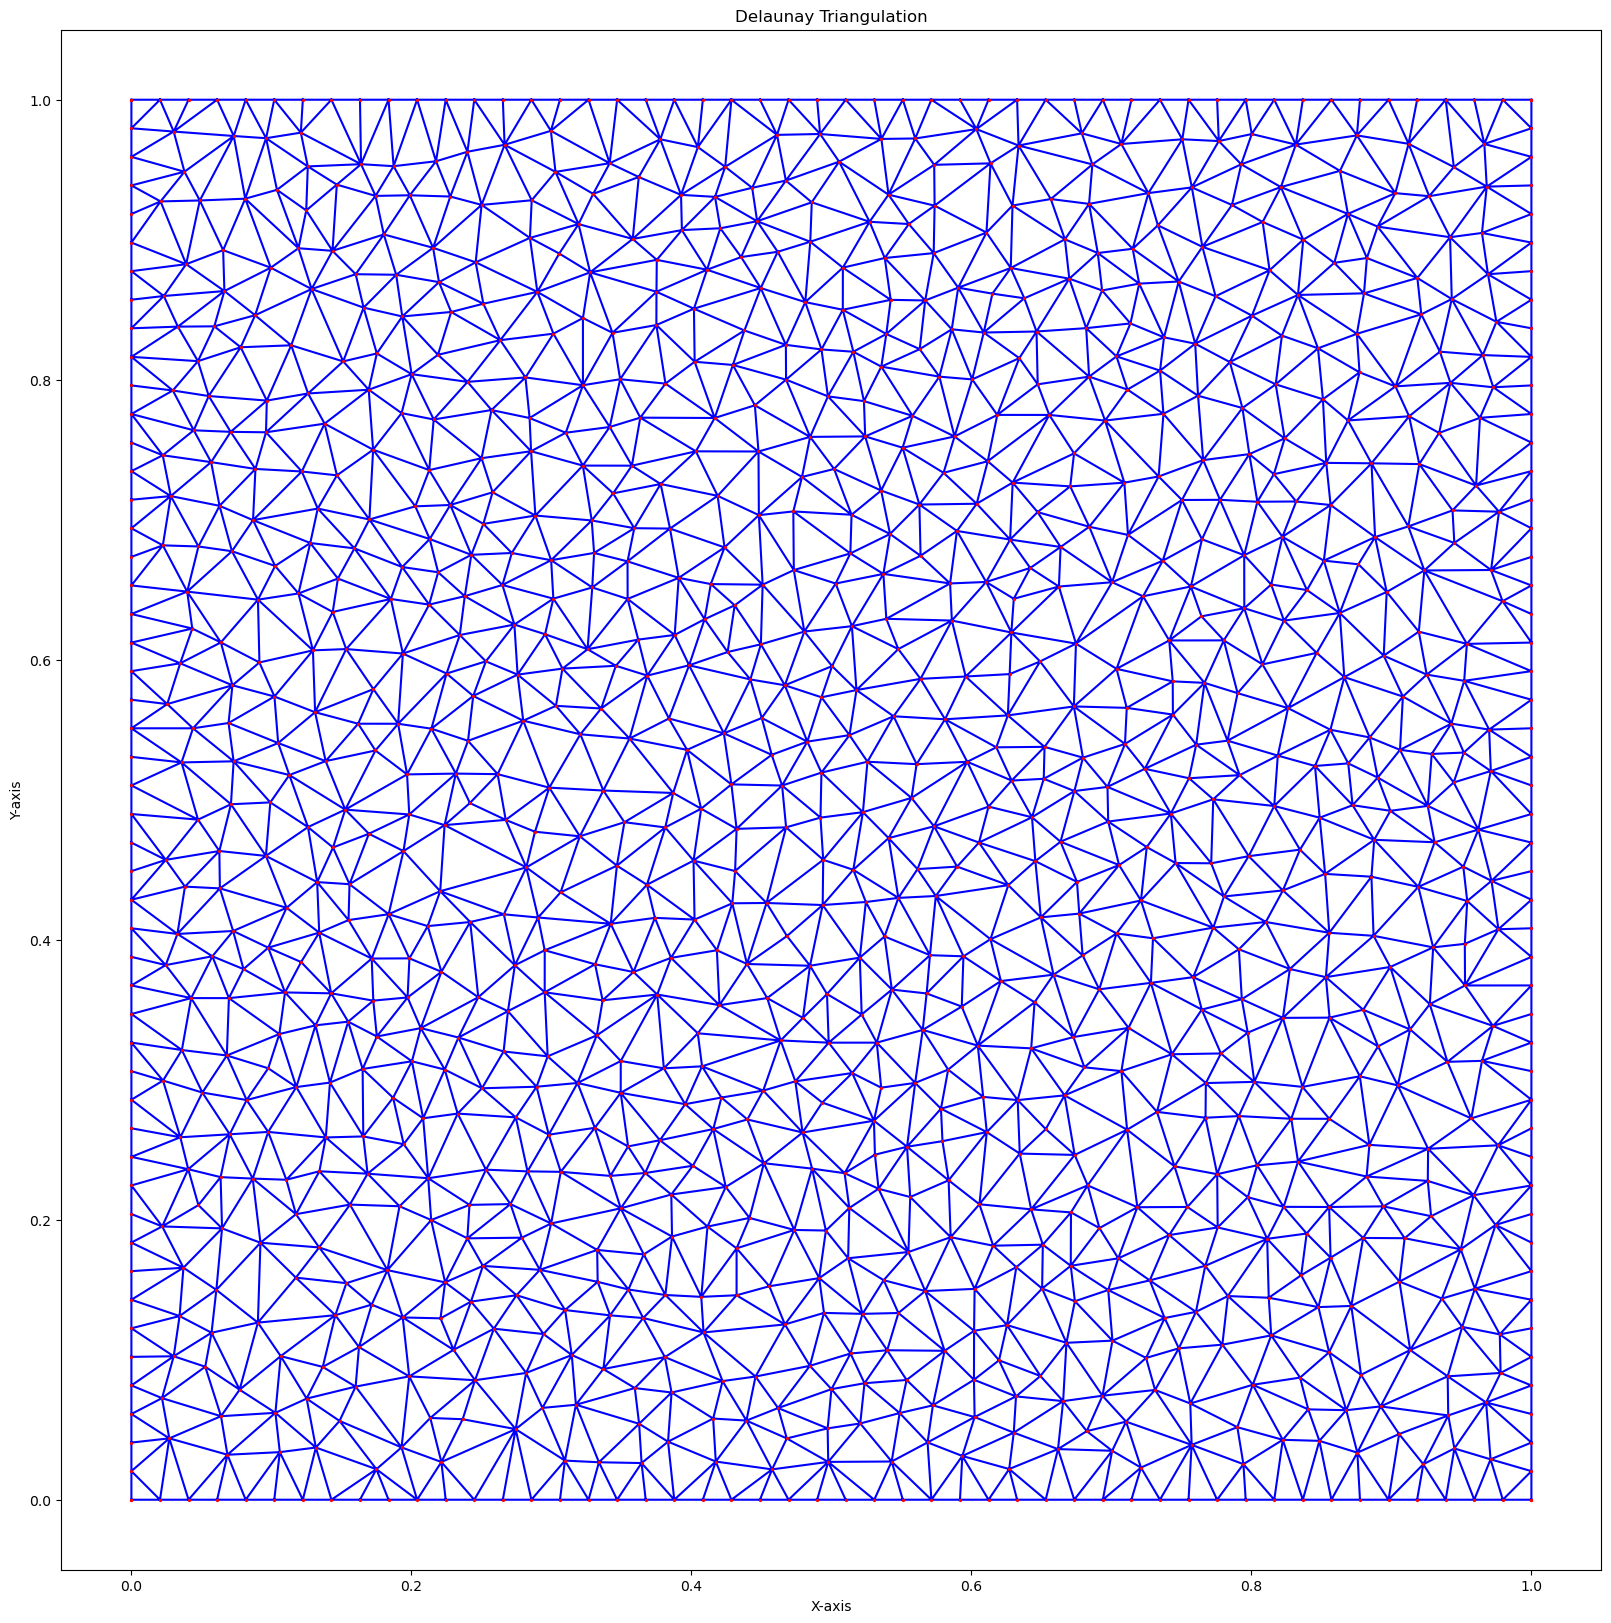

In [18]:

import numpy as np
from skfem import MeshTri
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import distance

def generate_boundary_points(num_points_per_side):
    points = []
    for i in range(num_points_per_side):
        t = i / (num_points_per_side - 1)
        points.append([t, 0])
        points.append([t, 1])
        points.append([0, t])
        points.append([1, t])
    return np.array(points)

def generate_interior_points(num_points, minimum_distance, boundary_points):
    points = boundary_points.tolist()
    while len(points) < num_points:
        point = np.random.rand(2)
        if all(distance.euclidean(point, p) >= minimum_distance for p in points):
            points.append(point)
    return np.array(points)


num_boundary_points_per_side = 50  
num_points = 1200
minimum_distance = 0.0225

boundary_points = generate_boundary_points(num_boundary_points_per_side)

points = generate_interior_points(num_points, minimum_distance, boundary_points)

tri = Delaunay(points)

mesh = MeshTri(points.T, tri.simplices.T)

plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='blue')
plt.scatter(points[:, 0], points[:, 1], color='red', s=1.75)
plt.gca().set_aspect(1.0)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.title('Delaunay Triangulation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

